# Capstone project - The battle of neighbourhoods

## Introduction and business problem

#### Introduction
Toronto is the provincial capital of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The Greater Toronto Area (GTA) as a whole had a 2016 population of 6,417,516. The city covers an area of 630.20 square kilometres (243.32 sq mi) and comprises six districts – East York, Etobicoke, North York, Old Toronto, Scarborough and York – which were amalgamated to form Toronto's present boundaries in 1998. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.
The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. While the majority of Torontonians speak English as their primary language, over 160 languages are spoken in the city.

#### Business Problem

With its excellent business opportunities and diverse cosmopolitan culture, Toronto attract a lot of expats who come to the city for employment. Any new expat to the city would be looking to rent an apartment for living and staying.
A person looking to rent an apartment focusses on few things like rent amount, transportation, stores, entertainment options etc. So, as part of this project, we will list and visualize all major apartments/condos in the city of Toronto that are available for rent. We will cluster the neighbourhoods in order to recommend venues so that a prospective tenant can take an informed decision.

#### Assumption
1. The person is looking for 2-bedroom apartments only.
2. The apartment should be close to public transport.
3. There should be grocery and dining options available near the apartment.

## First Part  - Webscraping and importing of data into a dataframe

### Import standard libraries

In [176]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import BeautifulSoup for web scraping

In [177]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import urllib2

### Get RentCafe data - we will take data from the first 3 pages only for the purpose of this project

In [178]:
#RentCafe has 4 pages of data for 1 and 2 bedroom apartments, we will get the first page here
url = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url)
soup_01 = BeautifulSoup(html, 'lxml')
type(soup_01)

bs4.BeautifulSoup

In [179]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=2', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_02 = BeautifulSoup(html, 'lxml')
type(soup_02)

bs4.BeautifulSoup

In [180]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=3', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_03 = BeautifulSoup(html, 'lxml')
type(soup_03)

bs4.BeautifulSoup

#### Extract the apartment names from the webdata collected so far

In [185]:
mylink_01 = soup_01.find_all('h2')
length_mylink = len(mylink_01)
Apartment_Names=[]
for i in range(length_mylink):
    temp = mylink_01[i].attrs['title']
    Apartment_Names.append(temp)
mylink_02 = soup_02.find_all('h2')
length_mylink = len(mylink_02)
for i in range(length_mylink):
    temp = mylink_02[i].attrs['title']
    Apartment_Names.append(temp)    
mylink_03 = soup_03.find_all('h2')
length_mylink = len(mylink_03)
for i in range(length_mylink):
    temp = mylink_03[i].attrs['title']
    Apartment_Names.append(temp)        
#Apartment_Names

#### Extract the price of each apartment from the webdata collected so far

In [186]:
heds_01 = soup_01.find_all('div',class_ = 'price')
Apartment_Rent_Low = []
Apartment_Rent_High = []
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_02 = soup_02.find_all('div',class_ = 'price')  
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_03 = soup_03.find_all('div',class_ = 'price')  
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
        
#
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')        
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')                
#Apartment_Rent_High

#### Extract the street address of each apartment name from the webdata collected so far

In [187]:
heds_a_01 = soup_01.find_all('span',class_ = 'building-address')
length_mylink_01 = len(heds_a_01)
Apartment_Street=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)
heds_a_02 = soup_02.find_all('span',class_ = 'building-address')
length_mylink_02 = len(heds_a_02)
for i in range(length_mylink_02):
    temp = heds_a_02[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)    
heds_a_03 = soup_03.find_all('span',class_ = 'building-address')
length_mylink_03 = len(heds_a_03)
for i in range(length_mylink_03):
    temp = heds_a_03[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)        
#Apartment_Street

#### Extract the postal code of the apartment from the webdata collected so far

In [188]:
Apartment_PostalCode=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_02):
    temp = heds_a_02[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_03):
    temp = heds_a_03[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)    
#Apartment_PostalCode

#### Combine all the webdata collected so far into a dataframe

In [189]:
apartment_info = pd.DataFrame(
                             {'Apt_Name':Apartment_Names,
                             'Apt_Street':Apartment_Street,
                             'Rent_Low': Apartment_Rent_Low,
                             'Rent_High': Apartment_Rent_High,
                             'PostalCode': Apartment_PostalCode
                             })
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,PostalCode
0,Parkside Square,55 Smooth Rose Court,1684,2416,M2J 0G7
1,Main Square,2575 Danforth Avenue,1473,2450,M4C 1L5
2,The Residence At Weston,33 King Street,2200,,M9N 3R7
3,West22,22 John St.,1780,2845,M9N 0B1
4,VIA123,123 Parkway Forest Dr.,2450,2947,M2J 0G1


#### Process and transform the data

In [190]:
# Drop all records that do not have a price
apartment_info = apartment_info.drop(apartment_info[(apartment_info.Rent_Low == 'None') & (apartment_info.Rent_High == 'None')].index)
# For records where either the High or Low rent is misisng, replace it with Low/High as applicable
apartment_info['Rent_High'] = np.where(apartment_info.Rent_High == '',apartment_info.Rent_Low,apartment_info.Rent_High)
apartment_info['Rent_Low'] = np.where(apartment_info.Rent_Low == '',apartment_info.Rent_High,apartment_info.Rent_Low)
apartment_info = apartment_info.reset_index(drop=True)
# Convert datatype of price to integer and calculate the average rent
apartment_info['Rent_Low'] = apartment_info['Rent_Low'].astype(str).astype(int)
apartment_info['Rent_High'] = apartment_info['Rent_High'].astype(str).astype(int)
apartment_info['Rent_Avg'] = apartment_info[['Rent_Low', 'Rent_High']].mean(axis=1).round().astype(int)
#Sort the data and create a new column with the postal code prefix, also rename the PostalCode column
apartment_info = apartment_info.sort_values("PostalCode", axis=0, ascending=True)
apartment_info = apartment_info.reset_index(drop=True)
apartment_info['PostalCode_Prefix'] = apartment_info['PostalCode'].str.slice(0,3)
apartment_info  = apartment_info.rename(columns = {'PostalCode':'Postal_Code'}) 
apartment_info['Apt_Street'] = apartment_info['Apt_Street'].astype(str)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,PostalCode_Prefix
0,Cambridge Place Apartments,30 Denton Ave,1725,2475,M1L 4P2,2100,M1L
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,M1M
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,M1M
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,M1N
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,M1N


## Get Wikipedia Data for Toronto to extract the boroughs and neighbourhoods

#### Get HTML text data from the webpage, cleanup and copy it into a dataframe

In [191]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [192]:
rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')

In [193]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

In [194]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

In [195]:
df = pd.DataFrame(list_rows)

#### Further cleanup of the data to remove special chars, space etc

In [196]:
df1 = df[0].str.split('\n', expand=True)
df1[0] = df1[0].str.strip('[')
df1[2] = df1[2].str.strip(']')
df1[3] = df1[3].str.strip(']')
df1 =df1.drop(df1.columns[3:], axis = 1)
df1[1] = df1[1].str.lstrip(',')
df1[2] = df1[2].str.lstrip(',')
#Remove leading spaces
df1[0] = df1[0].str.strip()
df1[1] = df1[1].str.strip()
df1[2] = df1[2].str.strip()
df1 = df1.iloc[1:]

#### Get the table headers and clean up the header data

In [197]:
col_labels = soup.find_all('th')

In [198]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Postal Code\n, Borough\n, Neighborhood\n, Canadian postal codes\n]']


In [199]:
df2 = pd.DataFrame(all_header)
df2 = df2.replace('\n','', regex=True)
df2.head()

,0
0,"[Postal Code, Borough, Neighborhood, Canadian ..."


In [200]:
df2 = df2[0].str.split(',', expand=True)
df2[0] = df2[0].str.strip('[')
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()

#### Concatenate the header and text data, do some more data cleanup

In [201]:
frames = [df2,df1]
df3 = pd.concat(frames)

In [202]:
df3 = df3.rename(columns=df2.iloc[0])
df3 =df3.drop(df3.columns[[3]], axis = 1)
df3 = df3.rename(columns={'Postal Code':'PostalCode'})

In [203]:
postal_code_df = df3.iloc[1:]
list(postal_code_df.columns)

['PostalCode', 'Borough', 'Neighborhood']

#### Remove records where Borough is 'Not assigned', also check for Neighborhood where it is 'Not assigned' and replace with Borough data

In [204]:
postal_code_df = postal_code_df[postal_code_df['Borough'] != 'Not assigned']
postal_code_df = postal_code_df.reset_index(drop=True)

#### Keep records only with valid postal code

In [205]:
postal_code_df = postal_code_df[postal_code_df.PostalCode.str[0] == 'M']

In [206]:
postal_code_df['Neighborhood'] = np.where(postal_code_df['Neighborhood'] == 'Not assigned', postal_code_df['Borough'], postal_code_df['Neighborhood'])

In [207]:
postal_code_df.columns[postal_code_df.isna().any()].tolist()

[]

### Get the shape of the final dataframe

In [208]:
postal_code_df.shape

(103, 3)

## Part 2 - Get the latitude, longitude for each postal code in the dataframe

#### Get the GeoSpatial data

In [212]:
import requests # library to handle requests
!wget -q -O 'geospatial_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [213]:
geospatial_data_df = pd.read_csv('geospatial_data.csv')
geospatial_data_df = geospatial_data_df.rename(columns={'Postal Code':'PostalCode'})
geospatial_data_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge the latitude, longitude with the postal code dataframe

In [214]:
postal_code_with_latlong_df = pd.merge(left=postal_code_df, right=geospatial_data_df, how='left', left_on='PostalCode', right_on='PostalCode')
postal_code_with_latlong_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [215]:
postal_code_with_latlong_df.columns[postal_code_with_latlong_df.isna().any()].tolist()

[]

In [216]:
postal_code_with_latlong_df = postal_code_with_latlong_df.dropna()

In [217]:
postal_code_with_latlong_df.shape

(103, 5)

In [218]:
neighborhoods = postal_code_with_latlong_df
#neighborhoods.head(10)

In [219]:
neighborhoods = neighborhoods.sort_values("PostalCode", axis=0, ascending=True)
neighborhoods = neighborhoods.reset_index(drop=True)
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Merge the neighbourhoods data into the apartment info dataframe and cleanup data

In [220]:
apartment_info = pd.merge(left=apartment_info, right=neighborhoods, how='left', left_on='PostalCode_Prefix', right_on='PostalCode')
apartment_info = apartment_info.rename(columns = {'Borough_y':'Borough','Neighborhood_y':'Neighborhood','Latitude_y':'Latitude','Longitude_y':'Longitude'})
#neighborhoods
apartment_info = apartment_info.drop(apartment_info.columns[[6,7]],axis=1)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude
0,Cambridge Place Apartments,30 Denton Ave,1725,2475,M1L 4P2,2100,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Get Apartment Registration data from the City of Toronto website; the  excel data was downloaded from this site and will be used below
#### https://open.toronto.ca/dataset/apartment-building-registration/

In [221]:
apartment_reg_df = pd.read_csv('Apartment Building Registration Data.csv')
apartment_reg_df = apartment_reg_df[['_id','EXTERIOR_FIRE_ESCAPE','FIRE_ALARM','GARBAGE_CHUTES','BIKE_PARKING','BARRIER_FREE_ACCESSIBILTY_ENTR',
                                     'LOCKER_OR_STORAGE_ROOM','PETS_ALLOWED','SITE_ADDRESS','VISITOR_PARKING','YEAR_BUILT',
                                     'NO_OF_STOREYS','IS_THERE_EMERGENCY_POWER?','NON-SMOKING_BUILDING','NO_OF_ACCESSIBLEPARKING_SPACES',
                                     'NO_BARRIERFREE_ACCESSBLE_UNITS']]
apartment_reg_df.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,17269,NO,YES,NO,Not Available,NO,NO,NO,1157 O'CONNOR DR,UNAVAILABLE,1953.0,3,NO,YES,6.0,0.0
1,17270,NO,YES,NO,0 indoor parking spots and 8 outdoor parking s...,NO,NO,YES,983 KINGSTON RD,UNAVAILABLE,1925.0,3,NO,YES,0.0,0.0
2,17271,NO,YES,YES,Not Available,YES,YES,NO,15 ROEHAMPTON AVE,PAID,2019.0,36,YES,YES,2.0,0.0
3,17272,NO,YES,NO,Not Available,NO,YES,YES,1981 DUNDAS ST E,FREE,1958.0,3,NO,YES,13.0,0.0
4,17273,NO,YES,YES,0 indoor parking spots and 15 outdoor parking ...,YES,NO,YES,2431 FINCH AVE W,BOTH,1959.0,6,NO,NO,0.0,0.0


In [222]:
#apartment_info_sorted['Apt_Street'] = apartment_info['Apt_Street'].astype(str).str.lstrip()
apartment_info['Apt_Street_Lower'] = apartment_info['Apt_Street'].str.lower()
apartment_info = (apartment_info.assign(Apt_Street_Lower_num=apartment_info["Apt_Street_Lower"].str.extract(r"(\d+\.\d+|\d+)"))
                                             .assign(Apt_Street_Lower_Str=apartment_info["Apt_Street_Lower"].str.replace(r"(\d+\.\d+|\d+)","")))
apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_info_sorted = apartment_info_sorted_temp.reset_index(drop=True)
apartment_info_sorted.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Apt_Street_Lower,Apt_Street_Lower_num,Apt_Street_Lower_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,345 lonsdale road,345,lonsdale road
1,Kelvingrove Apartments,6 Airdrie Road,1825,2250,M4G 1L7,2038,East York,Leaside,43.709060,-79.363452,6 airdrie road,6,airdrie road
2,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,50 alexander street,50,alexander street
3,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,40 alexander street,40,alexander street
4,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,143 and 145 arlington avenue,143,and arlington avenue


In [223]:
apartment_reg_df['Apt_Street_Lower_Reg'] = apartment_reg_df['SITE_ADDRESS'].str.lower()
apartment_reg_df = (apartment_reg_df.assign(Apt_Street_Lower_Reg_num=apartment_reg_df["Apt_Street_Lower_Reg"].str.extract(r"(\d+\.\d+|\d+)"))
                                    .assign(Apt_Street_Lower_Reg_Str=apartment_reg_df["Apt_Street_Lower_Reg"].str.replace(r"(\d+\.\d+|\d+)","")))
#apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_reg_df_temp = apartment_reg_df.sort_values("Apt_Street_Lower_Reg_Str", axis=0, ascending=True)
apartment_reg_df_sorted = apartment_reg_df_temp.reset_index(drop=True)
apartment_reg_df_sorted.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,20106,NO,YES,YES,Not Available,YES,NO,YES,140 ADANAC DR,BOTH,1970.0,16,YES,YES,6.0,1.0,140 adanac dr,140,adanac dr
1,19221,NO,YES,YES,Not Available,NO,NO,YES,90 ADELAIDE ST E,UNAVAILABLE,1980.0,8,YES,NO,0.0,0.0,90 adelaide st e,90,adelaide st e
2,19239,NO,YES,YES,Not Available,YES,YES,YES,501 ADELAIDE ST E,PAID,2009.0,13,YES,YES,3.0,4.0,501 adelaide st e,501,adelaide st e
3,19447,NO,YES,YES,Not Available,YES,NO,YES,552 ADELAIDE ST W,UNAVAILABLE,2005.0,5,YES,NO,0.0,0.0,552 adelaide st w,552,adelaide st w
4,17465,YES,YES,YES,Not Available,YES,NO,YES,800 ADELAIDE ST W,UNAVAILABLE,1987.0,3,NO,NO,0.0,4.0,800 adelaide st w,800,adelaide st w


#### Perform Fuzzy search to match the addresses of the two dataframes as that is the only common column between the two.

In [224]:
import pandas as pd
import fuzzy_pandas as fpd

df1 = apartment_info_sorted
df2 = apartment_reg_df_sorted
# Fuzzy match the string portion of the addresses of the two dataframes
df_combined = fpd.fuzzy_merge(df1, df2,
            left_on='Apt_Street_Lower_Str',
            right_on='Apt_Street_Lower_Reg_Str',
            ignore_case=True,
            method='levenshtein',
            threshold=0.8)

df_combined.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1930.0,4,NO,NO,1.0,0.0,323 lonsdale rd,323,lonsdale rd
1,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1923.0,4,YES,NO,0.0,0.0,316 lonsdale rd,316,lonsdale rd
2,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1957.0,6,YES,NO,0.0,0.0,340 lonsdale rd,340,lonsdale rd
3,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1920.0,5,NO,NO,0.0,0.0,321 lonsdale rd,321,lonsdale rd
4,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1927.0,4,NO,YES,0.0,0.0,312 lonsdale rd,312,lonsdale rd


#### Since Fuzzy match was performed on the string part of address, it would result in a lot of false positives. We need to match the house number of both dataframes and only keep records that have a match. Those records are true positives.

In [225]:
apartment_info_combined_info = df_combined[df_combined['Apt_Street_Lower_Reg_num'] == df_combined['Apt_Street_Lower_num']]
apartment_info_combined_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
6,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1970.0,6,NO,YES,0.0,0.0,345 lonsdale rd,345,lonsdale rd
12,140 Carlton,140 Carlton St.,1659,2149,M5A 3W7,1904,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,...,FREE,1973.0,23,YES,NO,0.0,375.0,140 carlton st,140,carlton st
16,Cambridge Place Apartments,30 Denton Ave,1725,2475,M1L 4P2,2100,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,...,PAID,1976.0,22,YES,NO,5.0,0.0,30 denton ave,30,denton ave
19,West22,22 John St.,1780,2845,M9N 0B1,2312,York,Weston,43.706876,-79.518188,...,BOTH,2018.0,31,YES,NaN,5.0,69.0,22 john st,22,john st
51,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,...,FREE,1967.0,17,YES,NO,2.0,201.0,2560 kingston rd,2560,kingston rd


In [226]:
#Get all the columns of df2 (Apartment Registered Dataframe)
df2_cols_list  = df2.columns.tolist()
#Add these empty columns to df1 (Apartment Info)
df1 = df1.reindex(columns=[*df1.columns.tolist(), *df2_cols_list], fill_value='')
#df1_cols_list = df1.columns.tolist()
# Merge the two dataframes together
apartment_info_combined_info = pd.concat([df1,apartment_info_combined_info],axis=0)
# Remove duplicates, for duplicates keep the one that has the apartment registered info
apartment_info_combined_info = apartment_info_combined_info.drop_duplicates(subset=['Apt_Name'], keep='last').reset_index(drop=True)
# Drop unnecessary and temporary columns
apartment_info_combined_info = apartment_info_combined_info.drop([ 'Apt_Street_Lower', 'Apt_Street_Lower_num', 'Apt_Street_Lower_Str', '_id', 'Apt_Street_Lower_Reg', 'Apt_Street_Lower_Reg_num', 'Apt_Street_Lower_Reg_Str'], axis=1)


In [227]:
apartment_info_combined_info

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,Kelvingrove Apartments,6 Airdrie Road,1825,2250,M4G 1L7,2038,East York,Leaside,43.709060,-79.363452,...,,,,,,,,,,
1,Village Green Community - 50,50 Alexander Street,1900,1900,M4Y 1B5,1900,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
2,Village Green Community - 40,40 Alexander Street,1895,2585,M4Y 1B5,2240,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,...,,,,,,,,,,
3,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,,,,,,,,,,
4,The Cottingham Manor,291 Avenue Road,1750,1750,M4V 2G9,1750,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,
5,South Algiers,565 Avenue Road,1884,2475,M4V 2J9,2180,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,
6,Davisville Village Community - 45,45 Balliol Street,1715,2550,M4S 1C3,2132,Central Toronto,Davisville,43.704324,-79.388790,...,,,,,,,,,,
7,Bayview Mews,2911 Bayview Avenue,1950,2850,M2K 1E8,2400,North York,Bayview Village,43.786947,-79.385975,...,,,,,,,,,,
8,Bexhill Court,12 Bexhill Court,1250,1750,M9A 3A8,1500,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,...,,,,,,,,,,
9,Residences On Bloor,235 Bloor Street East,1759,4200,M4W 3Y3,2980,Downtown Toronto,Rosedale,43.679563,-79.377529,...,,,,,,,,,,


### Now we will show some charts that analyses the data and displays salient features for the apartments

#### Display the 10 apartments by average rent ranking from low to High

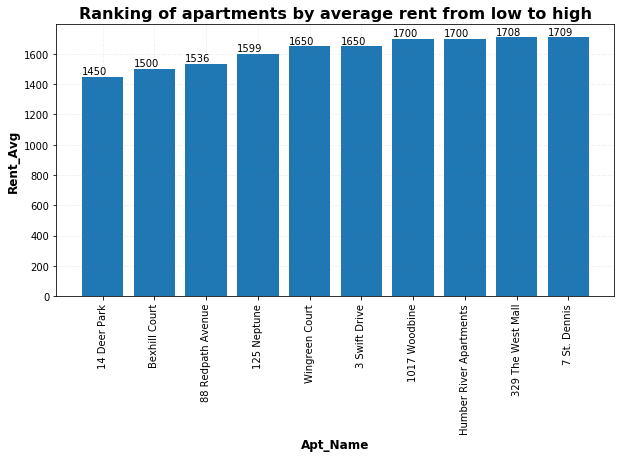

In [228]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = True).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from low to high',fontsize= 16,weight="bold")
plt.show()

#### Display the 10 apartments by average rent ranking from High to Low

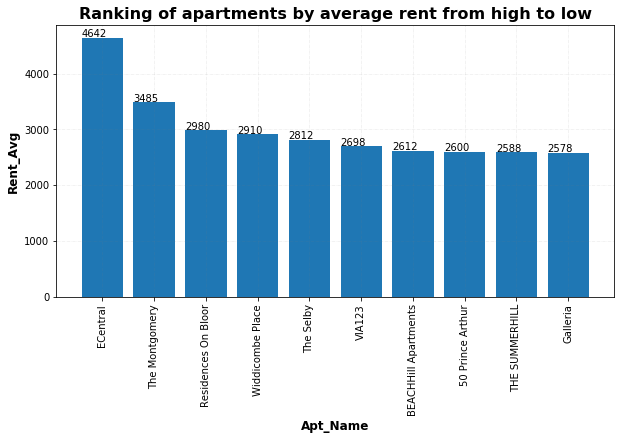

In [229]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from high to low',fontsize= 16,weight="bold")
plt.show()

#### Display top 5 apartments with accessible parking spaces

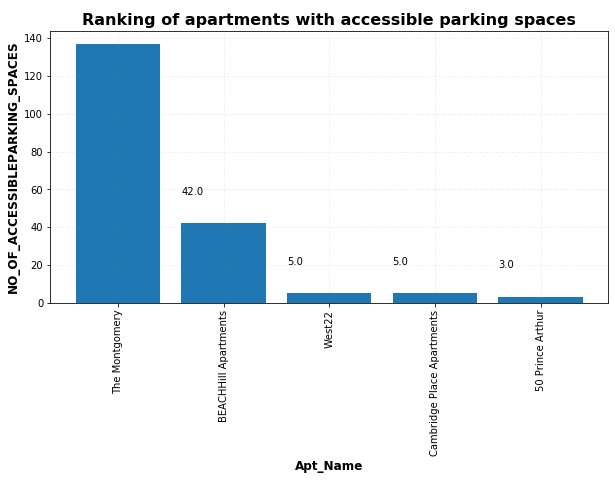

In [230]:
temp_df_rent_avg = apartment_info_combined_info.loc[:,('Apt_Name', 'NO_OF_ACCESSIBLEPARKING_SPACES')]
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].apply(lambda x: 0.0 if x == '' else x)
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].astype(float)
temp_df_rent_avg = temp_df_rent_avg.sort_values('NO_OF_ACCESSIBLEPARKING_SPACES', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:4]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("NO_OF_ACCESSIBLEPARKING_SPACES",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments with accessible parking spaces',fontsize= 16,weight="bold")
plt.show()

#### Display apartments that have an exterior fireescape and fire alarm

In [231]:
temp_df_rent = apartment_info_combined_info.loc[:,('Apt_Name',  'EXTERIOR_FIRE_ESCAPE', 'FIRE_ALARM')]
temp_df_rent = temp_df_rent.loc[(temp_df_rent['EXTERIOR_FIRE_ESCAPE'] >= 'YES') | (temp_df_rent['FIRE_ALARM'] >= 'YES')]
temp_df_rent_fire = temp_df_rent.reset_index(drop=True)
temp_df_rent_fire

,Apt_Name,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM
0,345 Lonsdale,NO,YES
1,140 Carlton,NO,YES
2,Cambridge Place Apartments,NO,YES
3,West22,NO,YES
4,2560 Kingston,NO,YES
5,2550 Kingston,NO,YES
6,The Montgomery,YES,YES
7,VIA123,NO,YES
8,50 Prince Arthur,NO,YES
9,329 The West Mall,NO,YES


## Part 3 -  Clustering of neighborhoods for 'Toronto' boroughs

### Install folium and geopy

In [232]:
pip install folium

In [233]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Import necessary packages

In [234]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Create map of Toronto for the selected boroughs and neighborhoods

In [235]:
address = 'Toronto City, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [236]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(apartment_info_combined_info['Latitude'], apartment_info_combined_info['Longitude'], apartment_info_combined_info['Borough'], apartment_info_combined_info['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [170]:
CLIENT_ID = 'FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U' # your Foursquare ID
CLIENT_SECRET = 'M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U
CLIENT_SECRET:M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4


In [171]:
#toronto_data = neighborhoods[neighborhoods['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data = apartment_info_combined_info
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [172]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 4 boroughs and 39 neighborhoods.


### Explore the first neighborhood in our dataframe.

In [173]:
toronto_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [174]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


   #### Now, let's get the top 100 venues that are in Regent Park within a radius of 500 meters. 
   #### Create the FourSquare URL first and then call it to get the results.

In [176]:
radius = 500
LIMIT =  100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U&client_secret=M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [177]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee7d878b336d03c8be8be3c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

#### Use the get_category_type function to get the category of each venue

In [179]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json data and put it into a dataframe

In [182]:
from pandas import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [183]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


### Explore the neighborhooods in Toronto

In [184]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [186]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])
                                 

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North &amp; West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airp

#### Check how many venues were returned for each neighborhood

In [274]:
print(toronto_venues.shape)
toronto_venues.head(30)

(1618, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
5,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
7,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
8,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,"Regent Park, Harbourfront",43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


In [188]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,31,31,31,31,31,31


In [189]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 237 uniques categories.


#### Analyze each neighborhood

In [190]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
toronto_onehot.shape

(1618, 237)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [197]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025641,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [198]:
toronto_grouped.shape

(39, 237)

#### Let's print each neighborhood along with the top 5 most common venues

In [200]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2          Restaurant  0.04
3  Seafood Restaurant  0.04
4         Cheese Shop  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3          Bakery  0.09
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0           Yoga Studio  0.06
1         Auto Workshop  0.06
2  Gym / Fitness Center  0.06
3         Garden Center  0.06
4                Garden  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4          Boutique  0.06


----Central Bay Street----
                 venue  freq
0      

#### Function to sort the venues in descending order

In [201]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Display the top 10 venues of each neighborhood

In [203]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Café,Cheese Shop,Beer Bar,Restaurant,Seafood Restaurant,Pub,Creperie
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Coffee Shop,Breakfast Spot,Grocery Store,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Park,Pizza Place,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Light Rail Station
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina,Airport Gate
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Burger Joint,Department Store,Salad Place,Bubble Tea Shop,Yoga Studio


### Cluster Neighborhoods

#### Run *k*-means to cluster the neighborhood into 5 clusters.

In [205]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [206]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Pub,Restaurant,Breakfast Spot,Café,Theater,Hotel,Dessert Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Diner,Bakery
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Restaurant,Clothing Store,Moroccan Restaurant,Cosmetics Shop,Creperie
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Pub,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store


#### Visualize the clusters

In [207]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the clusters created

In [208]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Park,Pub,Restaurant,Breakfast Spot,Café,Theater,Hotel,Dessert Shop
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Diner,Bakery
3,Downtown Toronto,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Restaurant,Clothing Store,Moroccan Restaurant,Cosmetics Shop,Creperie
5,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Bakery,Café,Cheese Shop,Beer Bar,Restaurant,Seafood Restaurant,Pub,Creperie
6,Downtown Toronto,0,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Burger Joint,Department Store,Salad Place,Bubble Tea Shop,Yoga Studio
7,Downtown Toronto,0,Grocery Store,Café,Park,Candy Store,Italian Restaurant,Diner,Baby Store,Restaurant,Coffee Shop,Nightclub
8,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,Deli / Bodega,Gym,Clothing Store,Thai Restaurant,Salad Place,Concert Hall
10,Downtown Toronto,0,Coffee Shop,Aquarium,Hotel,Café,Restaurant,Brewery,Sporting Goods Shop,Scenic Lookout,Fried Chicken Joint,Italian Restaurant
11,West Toronto,0,Bar,Asian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Café,Men's Store,Coffee Shop,Italian Restaurant,New American Restaurant,Brewery


In [209]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,1,Trail,Health Food Store,Pub,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
9,West Toronto,1,Bakery,Pharmacy,Bank,Bar,Middle Eastern Restaurant,Café,Supermarket,Grocery Store,Pet Store,Music Venue
15,East Toronto,1,Fast Food Restaurant,Sandwich Place,Steakhouse,Restaurant,Food & Drink Shop,Intersection,Sushi Restaurant,Italian Restaurant,Ice Cream Shop,Pizza Place
21,Central Toronto,1,Jewelry Store,Trail,Sushi Restaurant,Mexican Restaurant,Women's Store,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
22,West Toronto,1,Thai Restaurant,Mexican Restaurant,Café,Furniture / Home Store,Bar,Flea Market,Bakery,Cajun / Creole Restaurant,Speakeasy,Fried Chicken Joint
25,West Toronto,1,Gift Shop,Breakfast Spot,Restaurant,Cuban Restaurant,Eastern European Restaurant,Dog Run,Italian Restaurant,Bar,Dessert Shop,Movie Theater
32,Downtown Toronto,1,Airport Service,Airport Terminal,Airport Lounge,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina,Airport Gate
38,East Toronto,1,Yoga Studio,Auto Workshop,Park,Pizza Place,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Light Rail Station


In [210]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,2,Park,Gym,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,2,Park,Playground,Trail,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [211]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,3,Park,Swim School,Bus Line,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [212]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,4,Ice Cream Shop,Home Service,Garden,Women's Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [262]:
pip install geolocation-python

Note: you may need to restart the kernel to use updated packages.Collecting geolocation-python

  Created wheel for geolocation-python: filename=geolocation_python-0.2.2-py3-none-any.whl size=10844 sha256=c1077cdd51df374d513393cb11700e0c71c557761e41730404fcd7c6022b9225
  Stored in directory: c:\users\anindyaghosh\appdata\local\pip\cache\wheels\b8\ce\ac\bbccdb5f44756b03e61580f5657c929cf00e2124707e350501
Successfully built geolocation-python


In [273]:
from pyproj import CRS, Transformer
proj_espg=32012
geocoordinate_espg=4267
crs_ft = CRS.from_epsg(proj_espg)
crs_ll = CRS.from_epsg(geocoordinate_espg)
crs_ll

<Geographic 2D CRS: EPSG:4267>
Name: NAD27
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD27
- bounds: (167.65, 7.15, -47.74, 83.17)
Datum: North American Datum 1927
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich